In [1]:
import pandas as pd
import pysam
import numpy as np
import akita_utils
import h5py
from scipy import stats

from akita_utils.utils import ut_dense

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the summary tsv
input_tsv = "/home1/smaruj/akita_utils/bin/insert_virtual_dots_vs_boundaries/ctcf_tsv/filtered_base_mouse_ctcf_scored_and_averaged.tsv"
df = pd.read_table(input_tsv, sep="\t")

In [5]:
df.columns

Index(['boundary_index', 'chrom', 'boundary_end', 'index', 'num_ctcf', 'span',
       'boundary_start', 'strand', 'start', 'end', 'seq_id', 'boSCD_m1',
       'dotSCD_m1', 'dot-score_m1', 'cross-score_m1', 'x-score_m1', 'boSCD_m2',
       'dotSCD_m2', 'dot-score_m2', 'cross-score_m2', 'x-score_m2'],
      dtype='object')

# Averaging over models

In [6]:
model_indices = [1, 2]
col_names = ["boSCD", "dotSCD", "dot-score", "cross-score", "x-score"]

In [8]:
for score in col_names:
    ave_column_name = f"{score}_avg"
    columns_to_ave = [f"{score}_m{model_index}" for model_index in model_indices]
    df[ave_column_name] = df[columns_to_ave].mean(axis=1)

In [10]:
# df

# Plots (scores are averaged over targets, models, and backgrounds)

## A) Correlation between boundary SCD and dot SCD

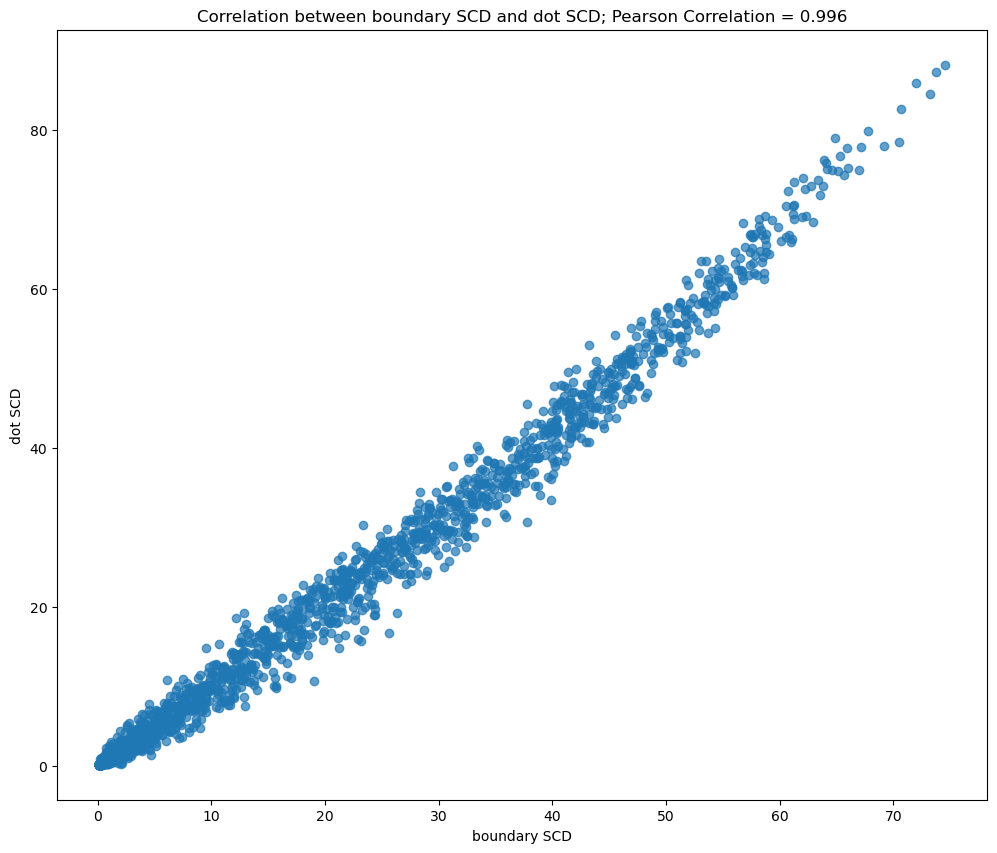

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["boSCD_avg"], df["dotSCD_avg"], alpha=0.7)

pearson_corr = stats.pearsonr(df["boSCD_avg"], df["dotSCD_avg"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot SCD")

ax.set_title(f"Correlation between boundary SCD and dot SCD; Pearson Correlation = {rounded_pearson_corr}")

plt.savefig("./plots/boundarySCD_vs_dotSCD.png", bbox_inches="tight")

plt.show()

## B) Boundary-SCD vs. cross-score

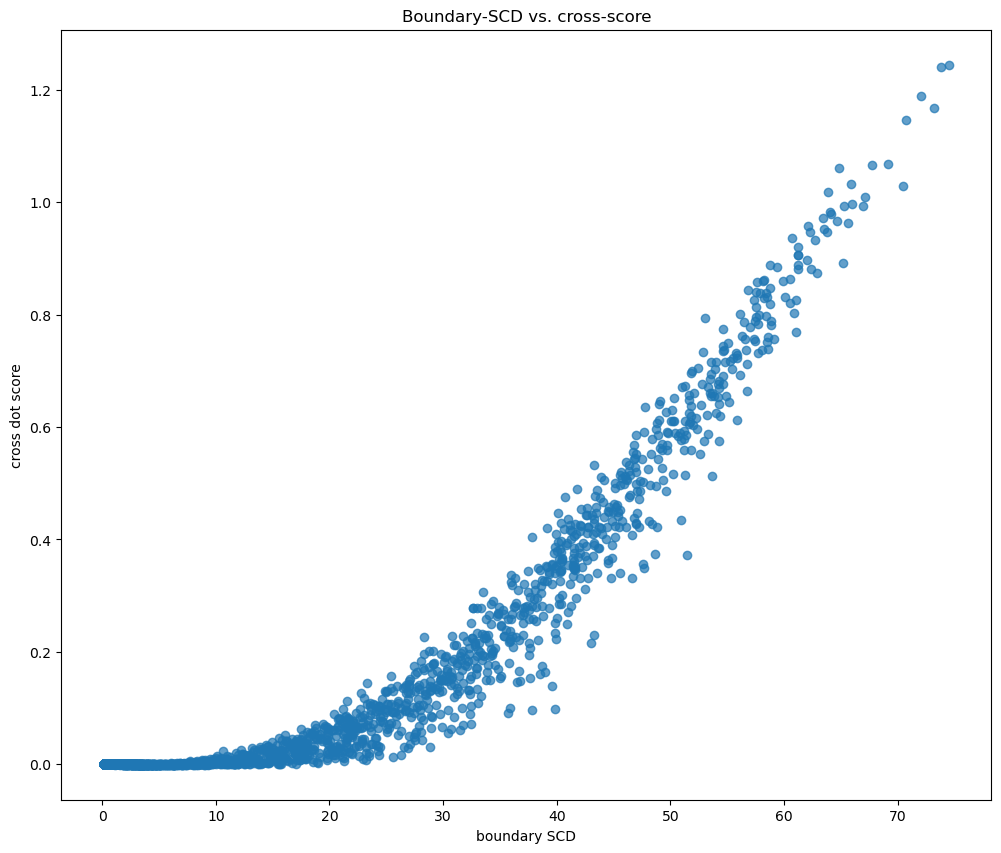

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["boSCD_avg"], df["cross-score_avg"], alpha=0.7)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

ax.set_title("Boundary-SCD vs. cross-score")

plt.savefig("./plots/boundarySCD_vs_cross-score.png", bbox_inches="tight")

plt.show()

## C) Boundary-SCD vs. dot-score

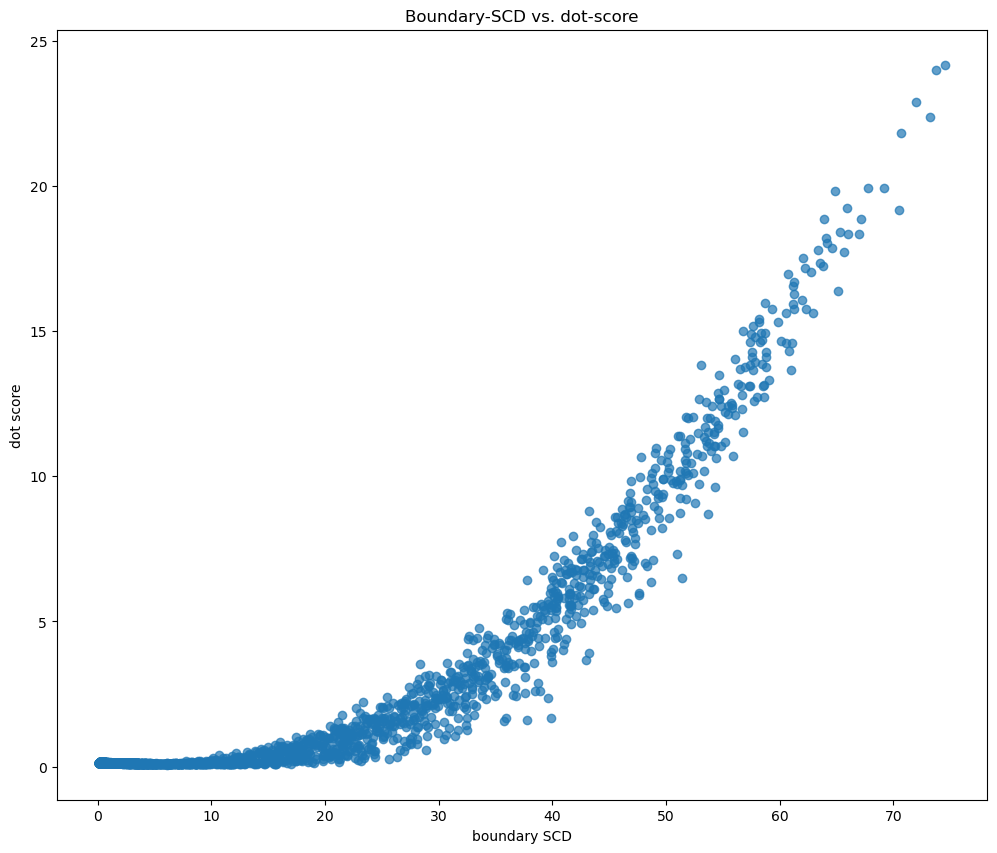

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["boSCD_avg"], df["dot-score_avg"], alpha=0.7)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot score")

ax.set_title("Boundary-SCD vs. dot-score")

plt.savefig("./plots/boundarySCD_vs_dot-score.png", bbox_inches="tight")

plt.show()

## D) Boundary-SCD vs. x-score

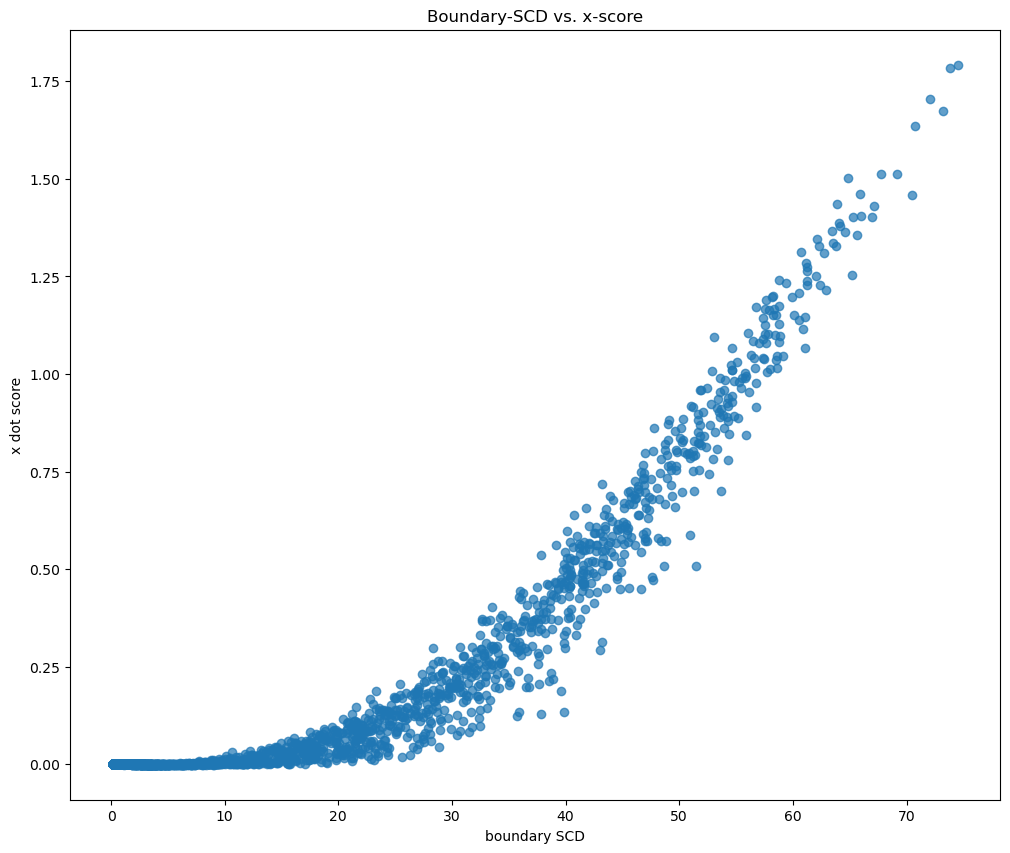

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["boSCD_avg"], df["x-score_avg"], alpha=0.7)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("x dot score")

ax.set_title("Boundary-SCD vs. x-score")

plt.savefig("./plots/boundarySCD_vs_x-score.png", bbox_inches="tight")

plt.show()

# Scatterplot with histograms on the margins

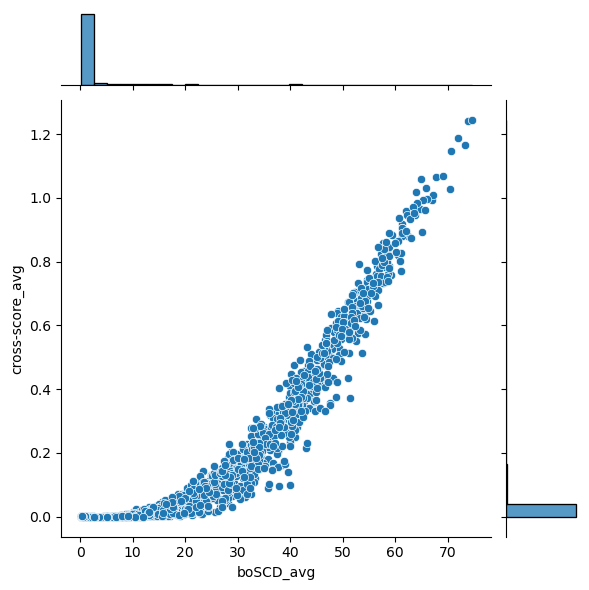

In [25]:
sns.jointplot(
    x=df["boSCD_avg"], y=df["cross-score_avg"], marginal_kws=dict(bins=30, fill=True),
)

### Let's plot histograms separately

<AxesSubplot:xlabel='cross-score_avg', ylabel='Count'>

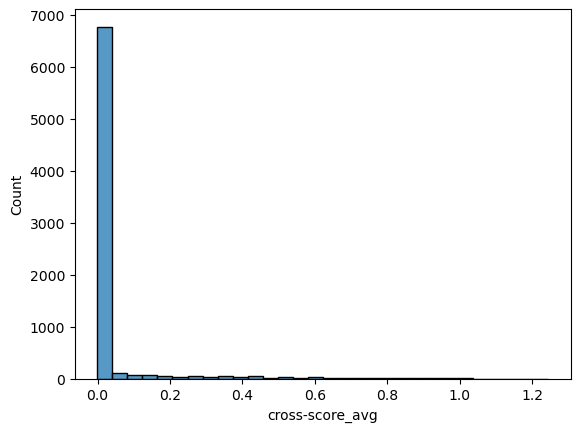

In [26]:
sns.histplot(x=df["cross-score_avg"], bins=30)

<AxesSubplot:xlabel='boSCD_avg', ylabel='Count'>

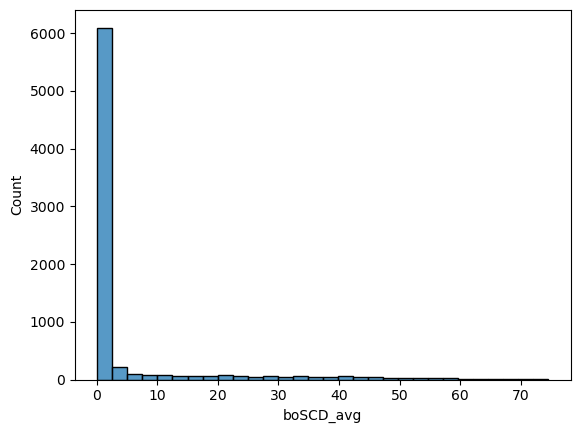

In [27]:
sns.histplot(x=df["boSCD_avg"], bins=30)

# Correlations between models for all scores

## Cross-score

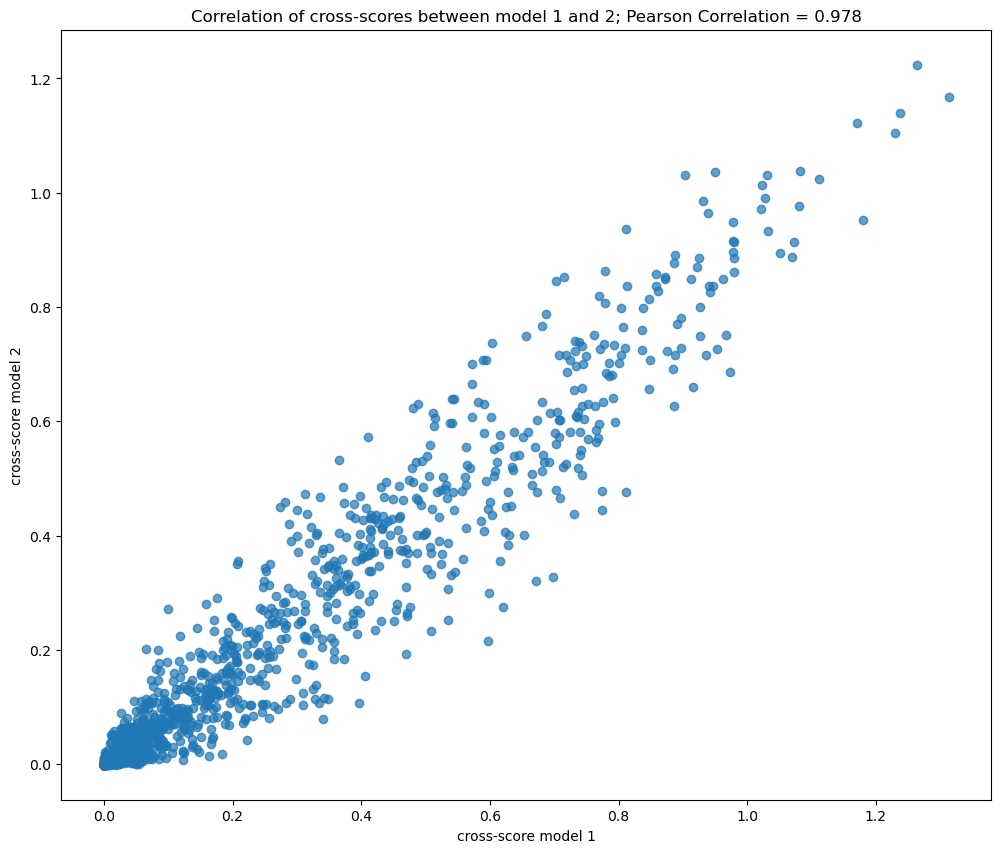

In [29]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["cross-score_m1"], df["cross-score_m2"], alpha=0.7)

pearson_corr = stats.pearsonr(df["cross-score_m1"], df["cross-score_m2"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("cross-score model 1")
ax.set_ylabel("cross-score model 2")

ax.set_title(f"Correlation of cross-scores between model 1 and 2; Pearson Correlation = {rounded_pearson_corr}")

plt.savefig("./plots/cross_score_corr_between_models.png", bbox_inches="tight")

plt.show()

## Dot-score

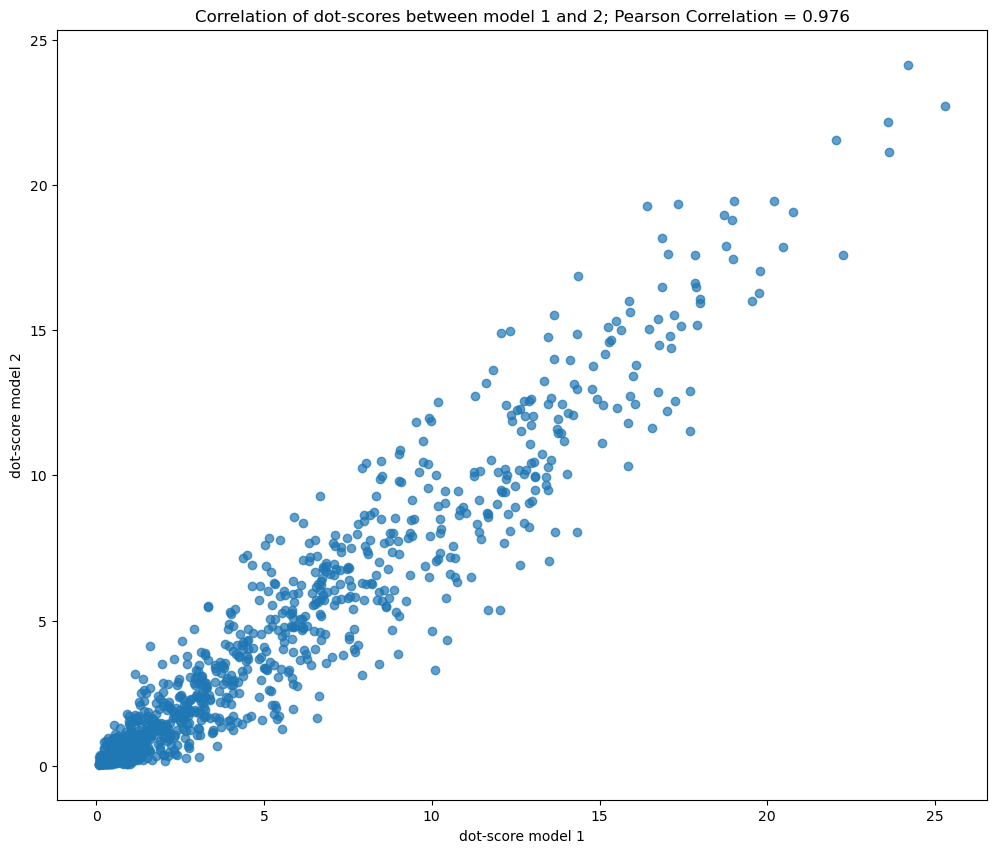

In [31]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["dot-score_m1"], df["dot-score_m2"], alpha=0.7)

pearson_corr = stats.pearsonr(df["dot-score_m1"], df["dot-score_m2"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("dot-score model 1")
ax.set_ylabel("dot-score model 2")

ax.set_title(f"Correlation of dot-scores between model 1 and 2; Pearson Correlation = {rounded_pearson_corr}")

plt.show()

## x-score

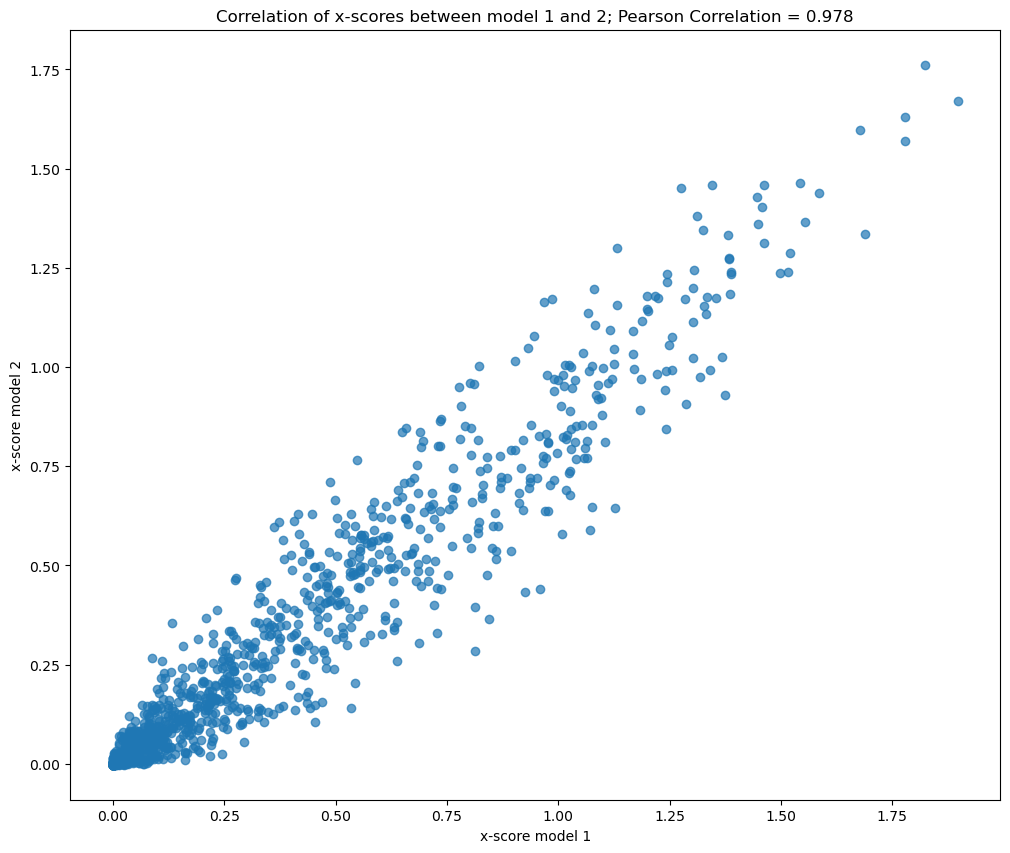

In [33]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["x-score_m1"], df["x-score_m2"], alpha=0.7)

pearson_corr = stats.pearsonr(df["x-score_m1"], df["x-score_m2"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("x-score model 1")
ax.set_ylabel("x-score model 2")

ax.set_title(f"Correlation of x-scores between model 1 and 2; Pearson Correlation = {rounded_pearson_corr}")

plt.show()

# Correlations between scores

In [38]:
col_names_avg = [col_name + "_avg" for col_name in col_names]

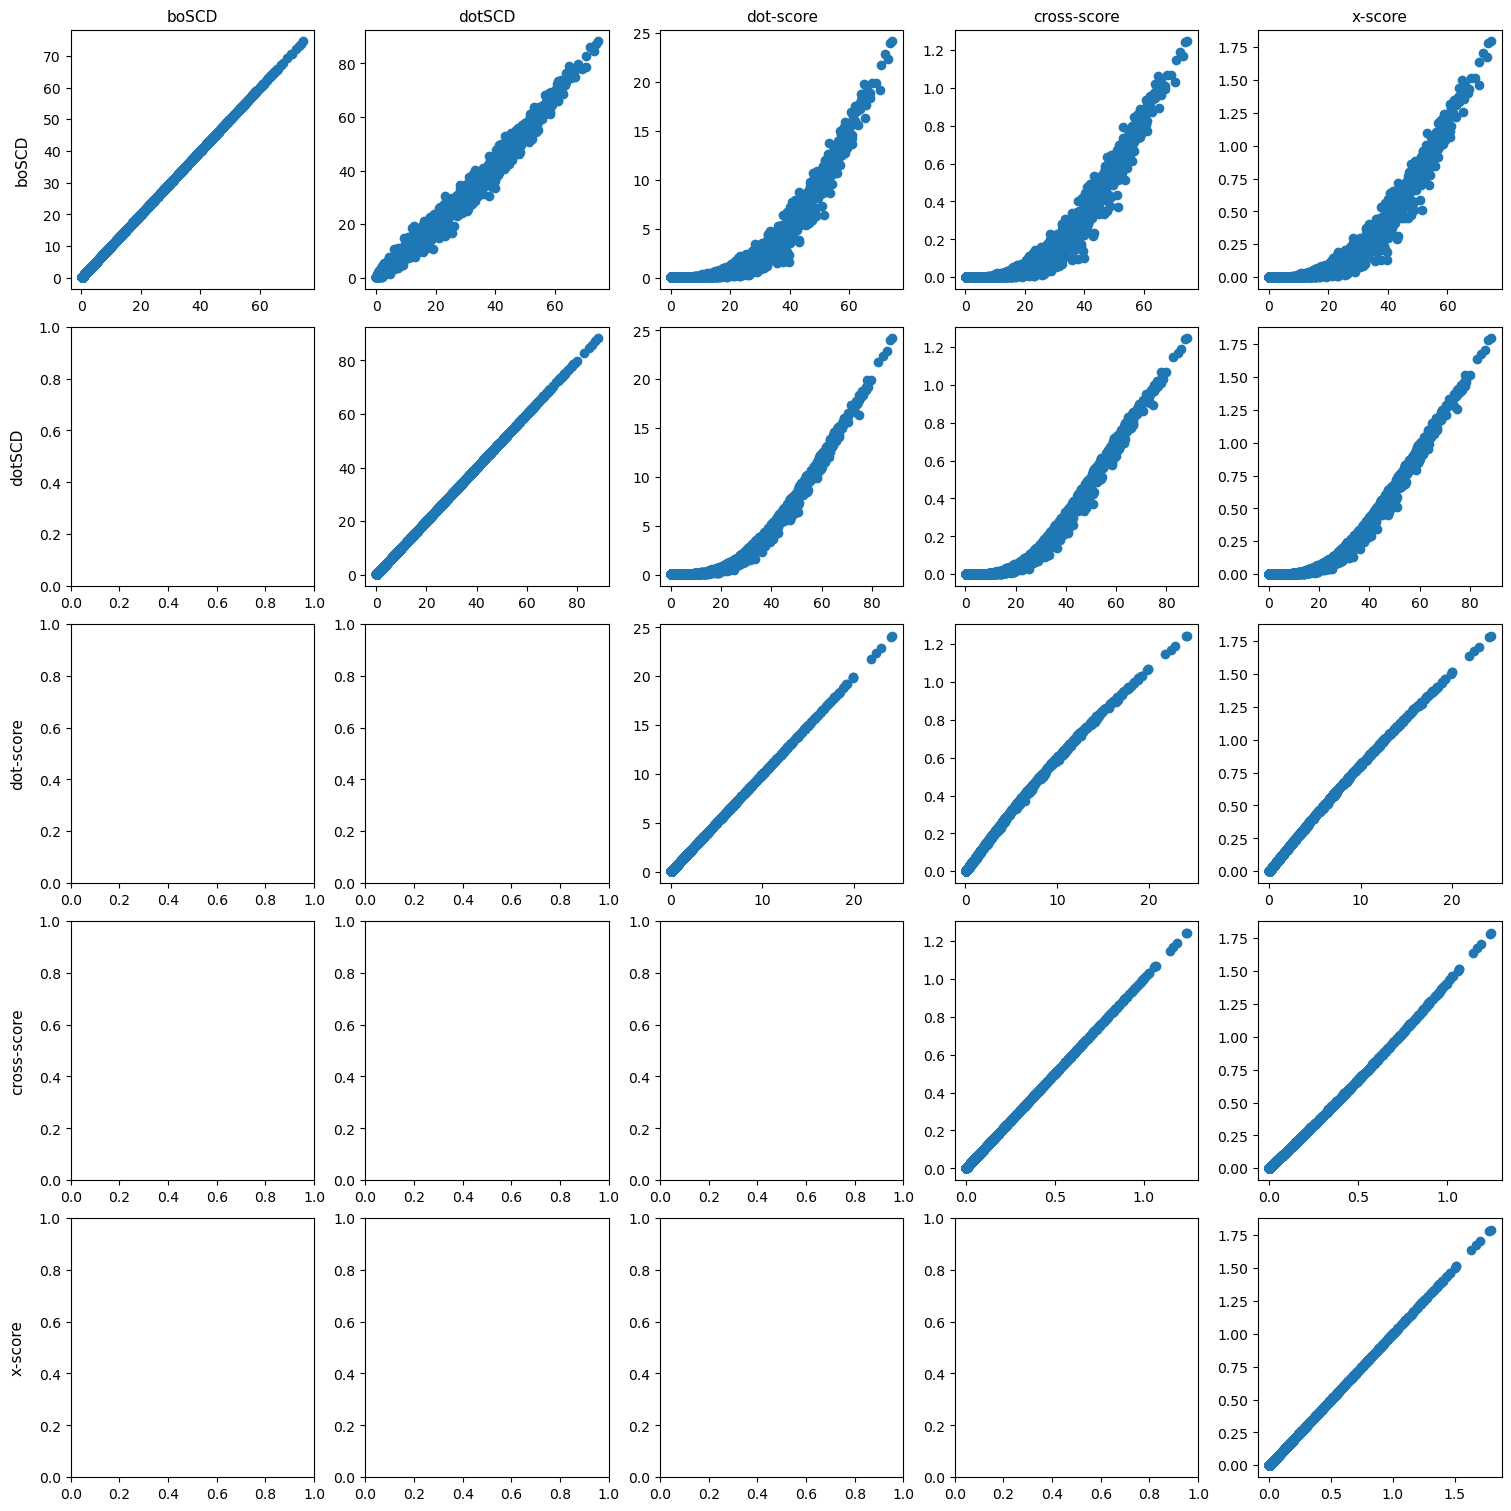

In [40]:
nr_scores = len(col_names)
core_corr_array = np.zeros((nr_scores, nr_scores))

fig, axs = plt.subplots(nr_scores, nr_scores, figsize=(15, 15), layout="constrained")

for score_index_x in range(nr_scores):
    for score_index_y in range(nr_scores):
        if score_index_y >= score_index_x:
            
            x = df[col_names_avg[score_index_x]]
            y = df[col_names_avg[score_index_y]]
            
            pearson_corr = stats.pearsonr(x, y).statistic
            rounded_pearson_corr = round(pearson_corr, 3)
            
            axs[score_index_x, score_index_y].scatter(x, y)
            core_corr_array[score_index_x, score_index_y] += rounded_pearson_corr

cols = rows = [score for score in col_names]

for ax, col in zip(axs[0], cols):
    ax.set_title(col, size=11)

for ax, row in zip(axs[:, 0],rows,):
    ax.set_ylabel(row, rotation=90, fontsize=11, labelpad=10)

In [41]:
core_corr_array

array([[1.   , 0.996, 0.89 , 0.91 , 0.904],
       [0.   , 1.   , 0.914, 0.931, 0.926],
       [0.   , 0.   , 1.   , 0.998, 0.999],
       [0.   , 0.   , 0.   , 1.   , 1.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   ]])

# Plotting mismatch-strand sites

In [51]:
mismatch_ids = []

with open("./mismatched_ids.txt", "r") as input:
    for line in input:
        mismatch_ids.append(int(line.strip()))

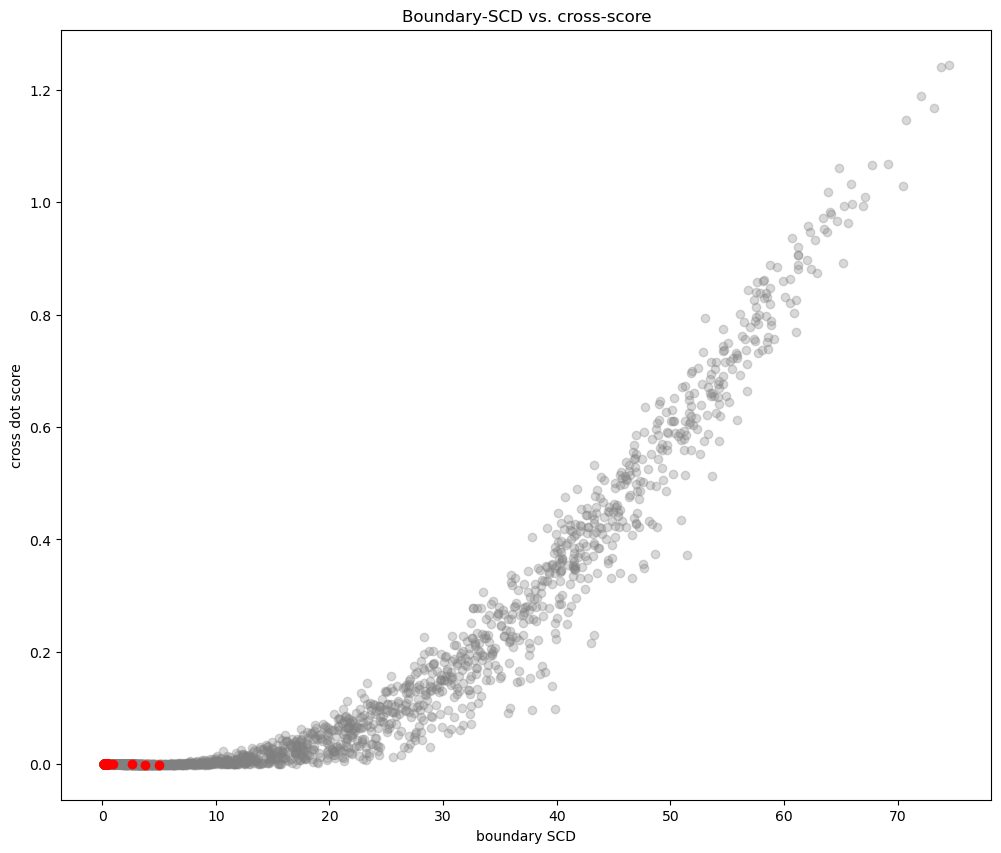

In [54]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["boSCD_avg"], df["cross-score_avg"], c = "gray", alpha=0.3)
scatter = ax.scatter(df["boSCD_avg"].iloc[mismatch_ids], df["cross-score_avg"].iloc[mismatch_ids], c="red")

ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

ax.set_title("Boundary-SCD vs. cross-score")

plt.show()

# Picking a random set of points to plot them

In [97]:
sample = [480, 1060, 3885, 7070, 210, 1260, 5110, 7175, 5313, 7546, 2956, 1189, 2006]

In [98]:
df.columns

Index(['boundary_index', 'chrom', 'boundary_end', 'index', 'num_ctcf', 'span',
       'boundary_start', 'strand', 'start', 'end', 'seq_id', 'boSCD_m1',
       'dotSCD_m1', 'dot-score_m1', 'cross-score_m1', 'x-score_m1', 'boSCD_m2',
       'dotSCD_m2', 'dot-score_m2', 'cross-score_m2', 'x-score_m2',
       'boSCD_avg', 'dotSCD_avg', 'dot-score_avg', 'cross-score_avg',
       'x-score_avg'],
      dtype='object')

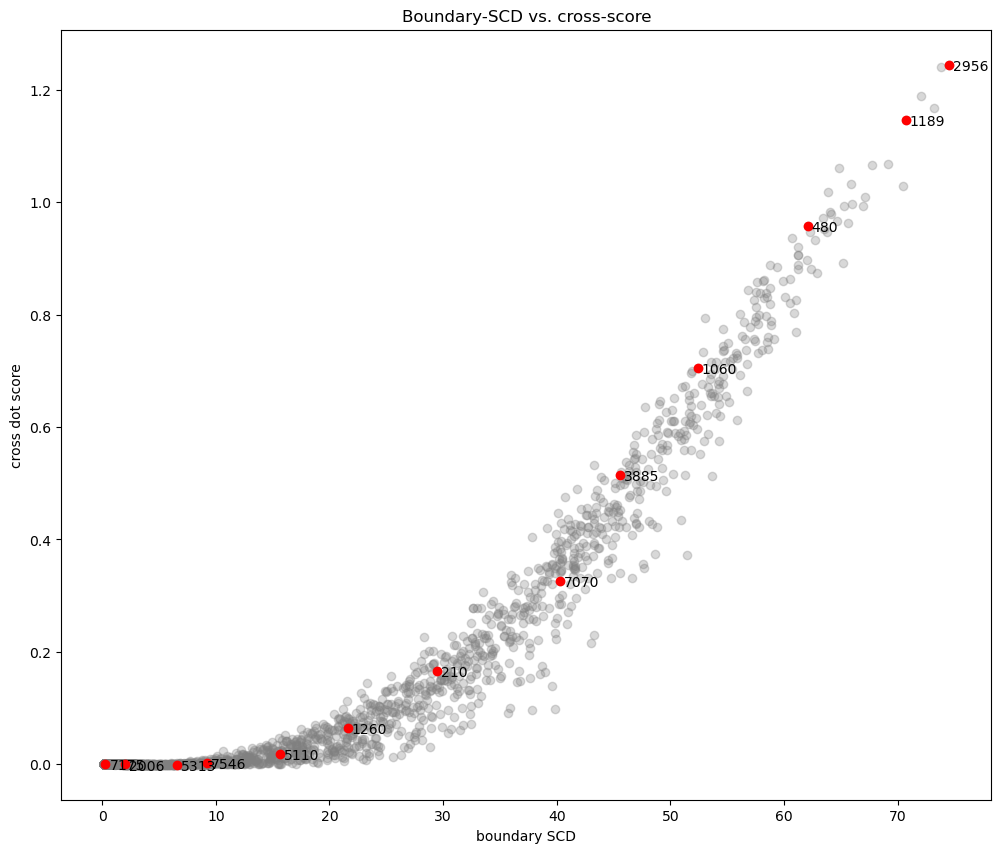

In [100]:
fig, ax = plt.subplots(figsize=(12, 10))

# Axes.scatter(x, y,...)
scatter = ax.scatter(df["boSCD_avg"], df["cross-score_avg"], c = "gray", alpha=0.3)
scatter = ax.scatter(df["boSCD_avg"].iloc[sample], df["cross-score_avg"].iloc[sample], c="red")

for sample_id in sample:
    plt.text(df["boSCD_avg"].iloc[sample_id]+0.35, df["cross-score_avg"].iloc[sample_id]-0.01, df.seq_id.iloc[sample_id], horizontalalignment='left', color='black')

ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

ax.set_title("Boundary-SCD vs. cross-score")

plt.show()